In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')

company = 'META'
start_date = '2010-06-29'
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

data = yf.download(company, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [41]:
data.head(5)

Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2012-05-18,37.995766,44.724287,37.767175,41.792360,573576400
2012-05-21,33.821499,36.435386,32.797811,36.306182,168192700
2012-05-22,30.810066,33.384198,30.750434,32.410203,101786600
2012-05-23,31.803940,32.300876,31.167862,31.177801,73600000
2012-05-24,32.827629,33.006527,31.575351,32.748121,50237200


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3374 entries, 2012-05-18 to 2025-10-17
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, META)   3374 non-null   float64
 1   (High, META)    3374 non-null   float64
 2   (Low, META)     3374 non-null   float64
 3   (Open, META)    3374 non-null   float64
 4   (Volume, META)  3374 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 158.2 KB


In [43]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
count,3374.000000,3374.000000,3374.000000,3374.000000,3.374000e+03
mean,213.309553,215.980986,210.532018,213.274460,2.846577e+07
std,171.284381,173.378639,169.142444,171.399174,2.529907e+07
min,17.621368,18.158061,17.442471,17.969224,4.726100e+06
25%,93.732161,94.937239,92.663754,93.662603,1.491828e+07
50%,170.121239,171.989745,168.242829,170.300148,2.102715e+07
75%,275.384789,278.657196,271.314904,275.832047,3.239948e+07
max,789.467163,795.712965,780.293380,790.616435,5.735764e+08


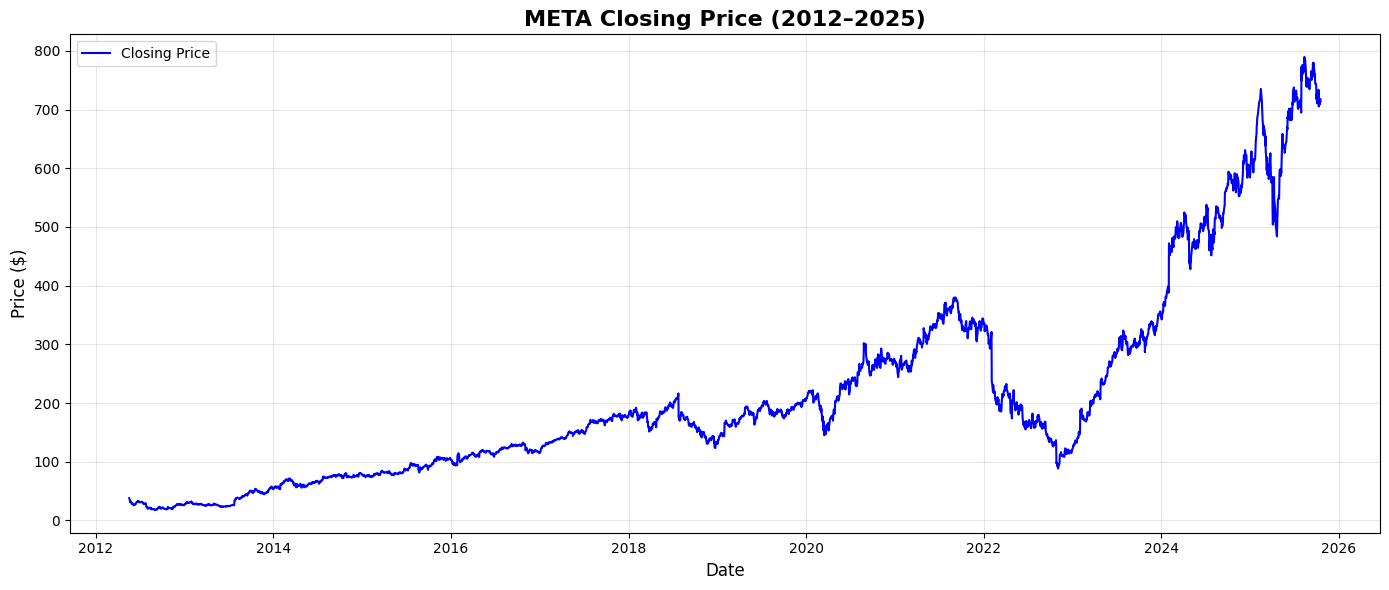

In [44]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Closing Price', color='blue', linewidth=1.5)
start_year = data.index.min().strftime('%Y')
end_year = data.index.max().strftime('%Y')
plt.title(f'{company} Closing Price ({start_year}–{end_year})', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

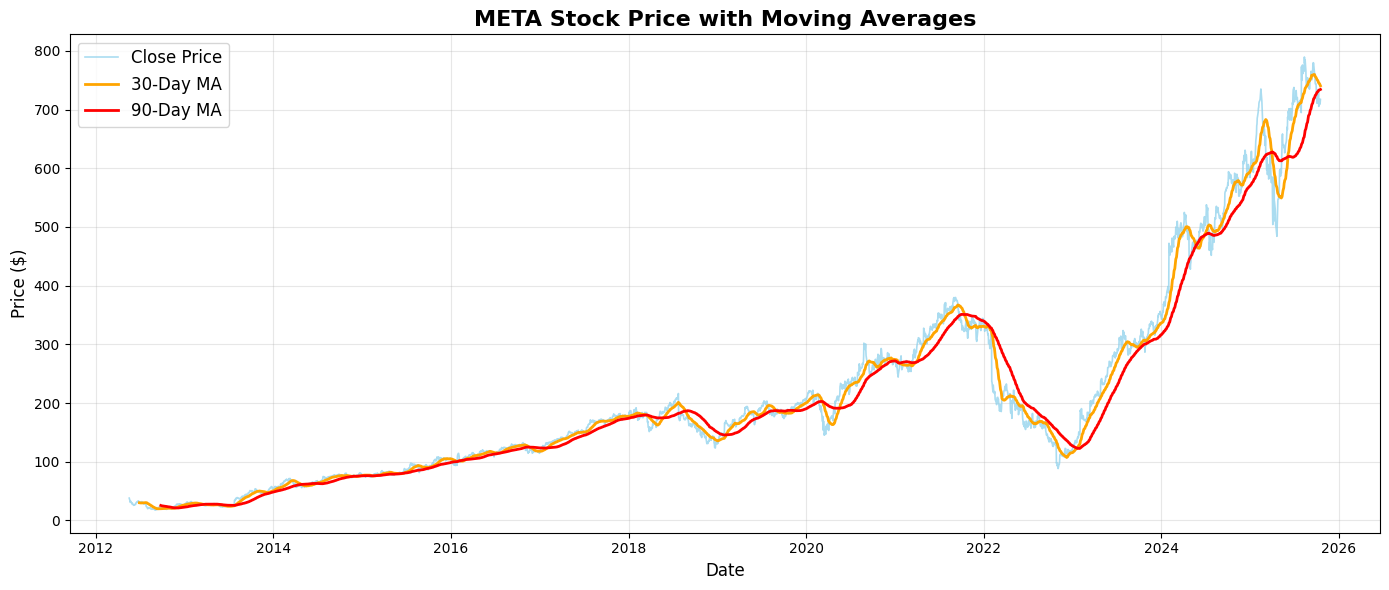

In [45]:
data['MA30'] = data['Close'].rolling(window=30).mean()
data['MA90'] = data['Close'].rolling(window=90).mean()

plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', color='skyblue', alpha=0.7, linewidth=1.2)
plt.plot(data['MA30'], label='30-Day MA', color='orange', linewidth=2)
plt.plot(data['MA90'], label='90-Day MA', color='red', linewidth=2)

plt.title(f'{company} Stock Price with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
data['Daily_Return'] = data['Close'].pct_change()

summary = data[['Close', 'Daily_Return']].describe().T

summary = summary.rename(columns={
    'min': 'Min',
    'max': 'Max',
    'mean': 'Mean',
    'std': 'Std'
})[['Min', 'Max', 'Mean', 'Std']]

print("📊 Key Statistics:")
print(summary.round(4))

📊 Key Statistics:
                         Min       Max      Mean       Std
Price        Ticker                                       
Close        META    17.6214  789.4672  213.3096  171.2844
Daily_Return         -0.2639    0.2961    0.0012    0.0251


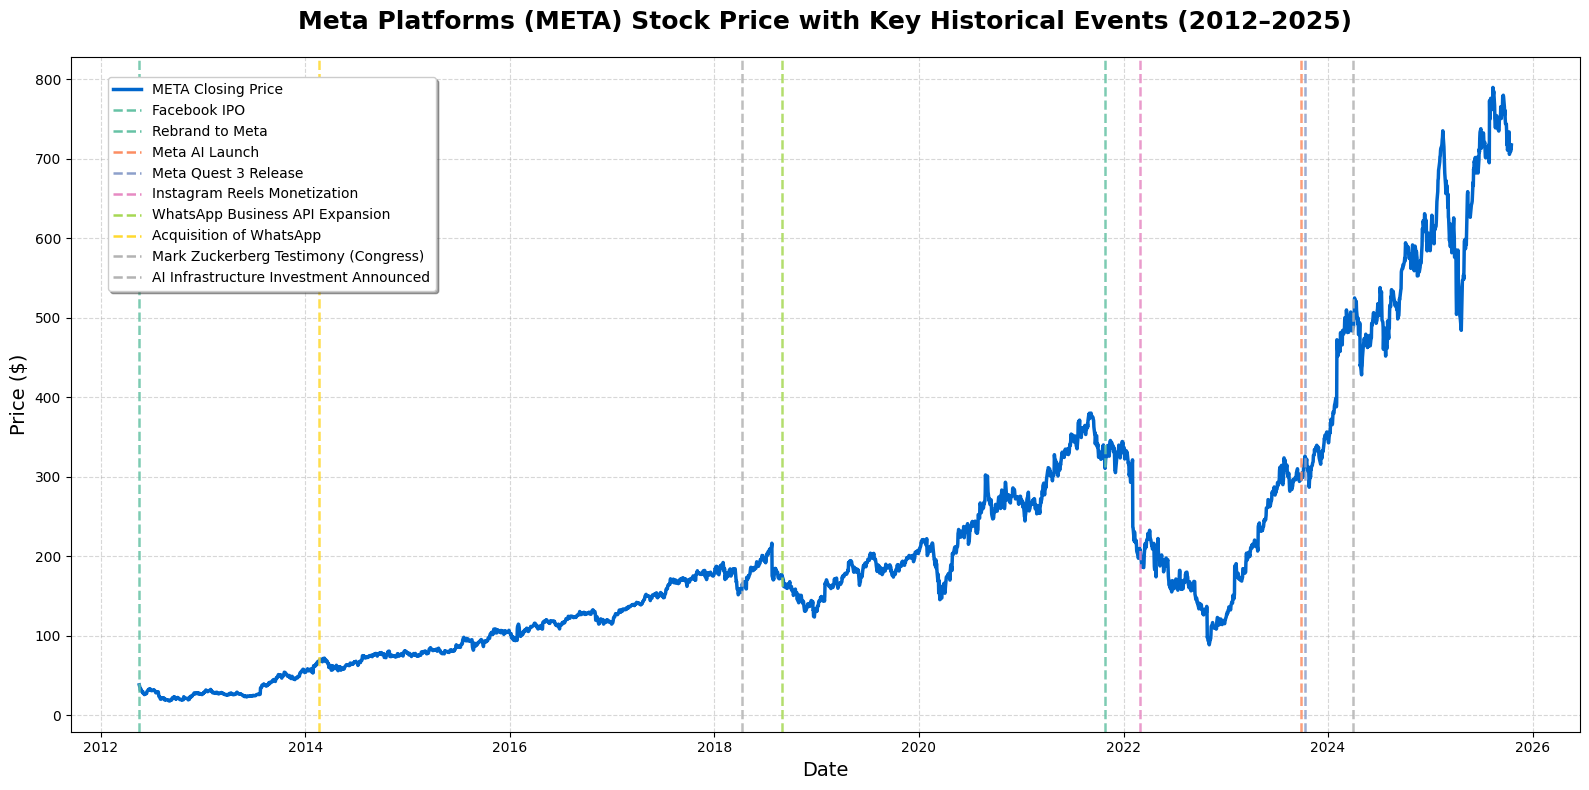

In [47]:
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Close'], color='#0066cc', linewidth=2.5, label='META Closing Price')

meta_events = {
    'Facebook IPO': '2012-05-18',
    'Rebrand to Meta': '2021-10-28',
    'Meta AI Launch': '2023-09-27',
    'Meta Quest 3 Release': '2023-10-10',
    'Instagram Reels Monetization': '2022-03-01',
    'WhatsApp Business API Expansion': '2018-09-01',
    'Acquisition of WhatsApp': '2014-02-19',
    'Acquisition of Instagram': '2012-04-09',
    'Mark Zuckerberg Testimony (Congress)': '2018-04-10',
    'AI Infrastructure Investment Announced': '2024-04-01',
}

valid_events = {
    event: date_str for event, date_str in meta_events.items()
    if pd.to_datetime(date_str) <= data.index.max()
}

colors = plt.cm.Set2(np.linspace(0, 1, len(valid_events)))

for i, (event, date_str) in enumerate(valid_events.items()):
    event_date = pd.to_datetime(date_str)
    if event_date >= data.index.min():
        plt.axvline(event_date, color=colors[i], linestyle='--', linewidth=1.8, alpha=0.85)
        plt.plot([], [], color=colors[i], linestyle='--', linewidth=1.8,
                 label=event)


plt.title('Meta Platforms (META) Stock Price with Key Historical Events (2012–2025)',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', fontsize=10, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

In [48]:
close_prices = data['Close'].values

split_idx = int(len(close_prices) * 0.8)
seq_len = 60


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = close_prices[:split_idx].reshape(-1, 1)
test_data = close_prices[split_idx:].reshape(-1, 1)

scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)


data_scaled = np.concatenate([scaled_train, scaled_test])

def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, seq_len=seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))


train_size = split_idx - seq_len
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

print(f"Total sequences: {len(X)}")
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Train covers up to original index: {train_size + seq_len - 1} (should be {split_idx - 1})")

Total sequences: 3314
Train samples: 2639, Test samples: 675
Train covers up to original index: 2698 (should be 2698)


In [49]:
assert np.isclose(y_train[-1], scaled_train[-1])
assert np.isclose(y_test[0], scaled_test[0])

print("✅ Train/test split validated: no data leakage detected.")
print(f"Last train target: {y_train[-1]:.6f} == scaled_train[-1]: {scaled_train[-1, 0]:.6f}")
print(f"First test target: {y_test[0]:.6f} == scaled_test[0]: {scaled_test[0, 0]:.6f}")

✅ Train/test split validated: no data leakage detected.
Last train target: 0.454658 == scaled_train[-1]: 0.454658
First test target: 0.439539 == scaled_test[0]: 0.439539


In [50]:
if data_scaled.ndim == 1:
    data_scaled = data_scaled.reshape(-1, 1)

X, y = [], []
seq_len = 60

for i in range(seq_len, len(data_scaled)):
    X.append(data_scaled[i - seq_len:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),

    Dense(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1143 - val_loss: 0.2567
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098 - val_loss: 0.0633
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - val_loss: 0.0618
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0568
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - val_loss: 0.0593
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - val_loss: 0.0473
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - val_loss: 0.0524
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - val_loss: 0.0525
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0524
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - val_loss: 0.0406
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0527
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_

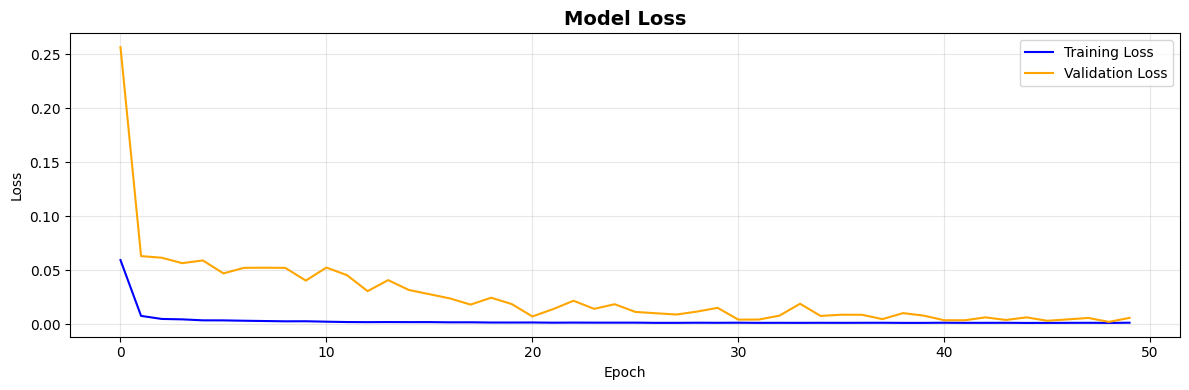

In [52]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


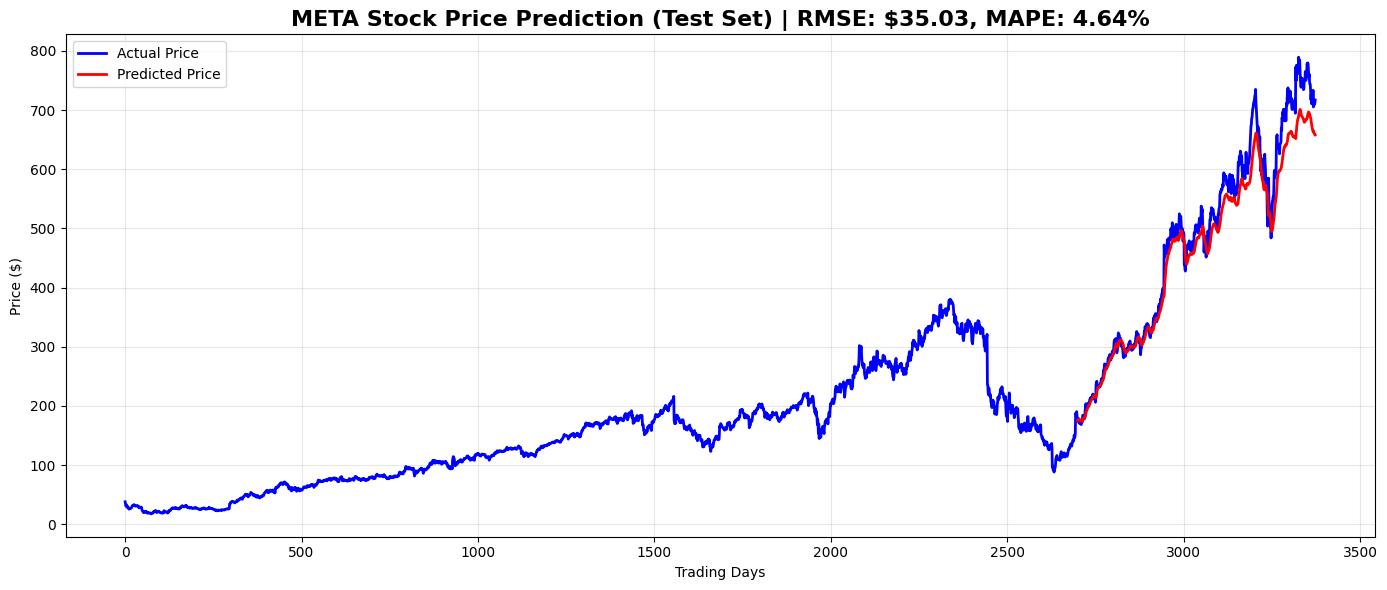

✅ Test Set Predictions (First 5):
  Day 2699: Actual=$176.83, Predicted=$173.95
  Day 2700: Actual=$173.08, Predicted=$175.36
  Day 2701: Actual=$178.33, Predicted=$175.78
  Day 2702: Actual=$178.38, Predicted=$176.93
  Day 2703: Actual=$176.07, Predicted=$177.83


In [53]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


company = 'META'
start_date = '2012-05-18'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
data = yf.download(company, start=start_date, end=end_date)


close_prices = data['Close'].values
seq_len = 60
split_idx = int(len(close_prices) * 0.8)

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(close_prices[:split_idx].reshape(-1, 1))
scaled_test = scaler.transform(close_prices[split_idx:].reshape(-1, 1))

data_scaled = np.concatenate([scaled_train, scaled_test])

def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, seq_len=seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

train_size = split_idx - seq_len
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]


model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),
    Dense(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=0
)

history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=0
)


y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100

test_start_idx = len(X_train) + seq_len
test_end_idx = test_start_idx + len(y_test)
test_days = np.arange(test_start_idx, test_end_idx)


plt.figure(figsize=(14, 6))
plt.plot(range(len(data)), data['Close'], label='Actual Price', color='blue', linewidth=2)
plt.plot(test_days, y_pred_inv, label='Predicted Price', color='red', linewidth=2, linestyle='-')

plt.title(f'META Stock Price Prediction (Test Set) | RMSE: ${rmse:.2f}, MAPE: {mape:.2f}%',
          fontsize=16, fontweight='bold')
plt.xlabel('Trading Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ Test Set Predictions (First 5):")
for i in range(5):
    print(f"  Day {test_days[i]}: Actual=${y_test_inv[i][0]:.2f}, Predicted=${y_pred_inv[i][0]:.2f}")